In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette='hsv')

In [2]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Seaborm Lmplots

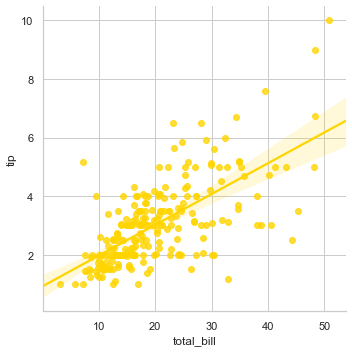

In [3]:
sns.lmplot(x='total_bill', y = 'tip', data=tips)

<b>In addition to above let's see a smoking person gives tips more or less in general

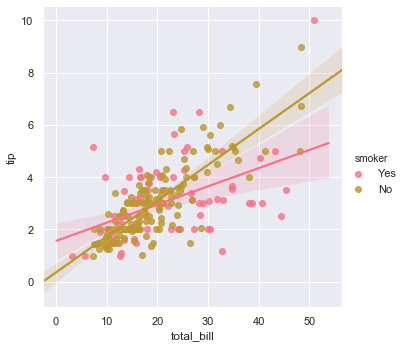

In [16]:
sns.set(palette="husl")
sns.lmplot(x = 'total_bill', y = 'tip', hue='smoker', data=tips)

<b> Reflecting that smokers are little more generous but not so consistnet with their tipping habit as data points are quite vguely spread out.

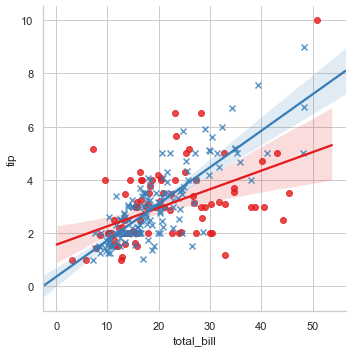

In [6]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers = ["o", "x"], palette="Set1", legend=False)

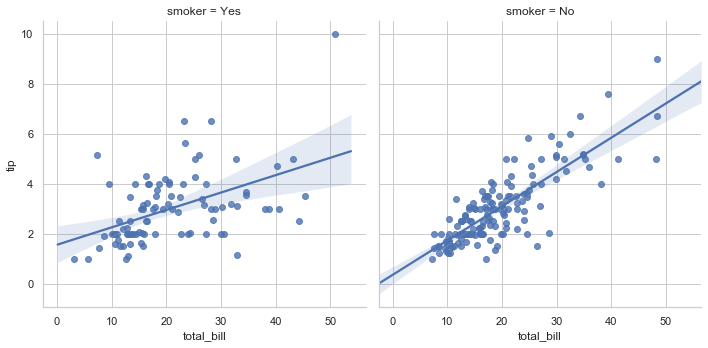

In [21]:
# To plot yes and no smoker on differnt graphs:
sns.set(style = 'whitegrid')
sns.lmplot(x = 'total_bill', y = 'tip', col = 'smoker', data = tips, palette='magma')

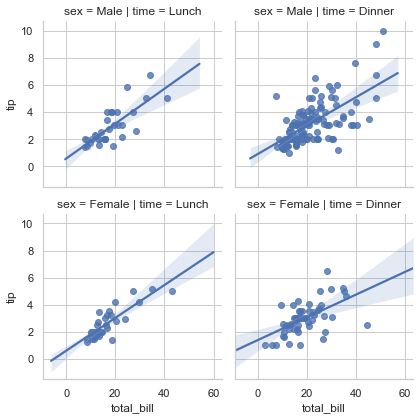

In [22]:
sns.lmplot(x = 'total_bill', y = 'tip', palette='magma', row='sex', col='time', data=tips, size=3)

In [31]:
def generatingData():
    num_points = 1500
    category_points = []
    
    for i in range(num_points):
        if np.random.random() > 0.5:
            x, y = np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)
        else:
            x, y = np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)
        category_points.append([x,y])
        
    df = pd.DataFrame(category_points, columns={'x', 'y'})
    
    sns.lmplot('x', 'y', data = df, fit_reg = True, size = 6)
    plt.show()

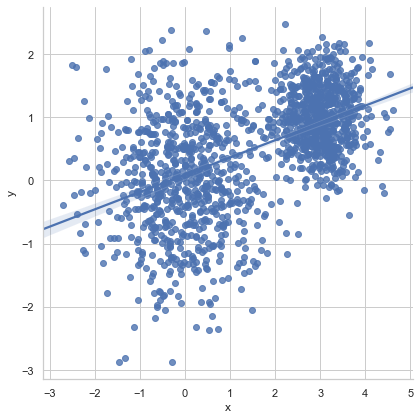

In [32]:
generatingData()

# Seaborn Regplots

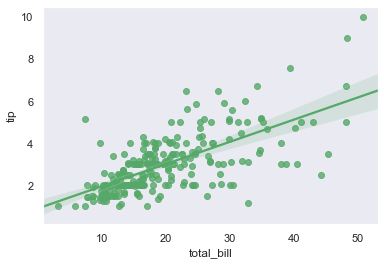

In [36]:
sns.set_style('dark')
sns.regplot(x = 'total_bill', y = 'tip', data = tips, color = 'g')

<b> Seaborn <code>regplot()</code> or <code>lmplot()</code> do not support regression against date data so if we're dealing with Time-series algorithms, please make a careful choice.<br> Also  <code>lmplot()</code>  is just a wrapper around <code>regplot()</code> and <code>facetgrid()</code>

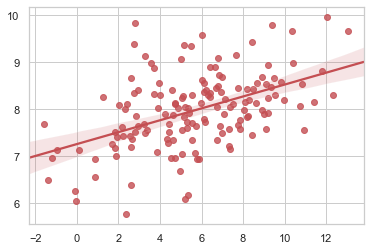

In [44]:
np.random.seed(10) #Initialize random state
mean, cov = [6, 8], [(1.5, .7), (9.7, 1)]  # Mean and Covariance
x, y = np.random.multivariate_normal(mean, cov, 150).T # Generalizing 1- Dimensional Gaussain Distribution to higher dimensions.
s = sns
s.set_style('whitegrid')
s.regplot(x = x, y = y, color='r')
del(s)

<b> Fitting complex data. TO fit a nonparamteric regression using a <code>lowess smoother</code>

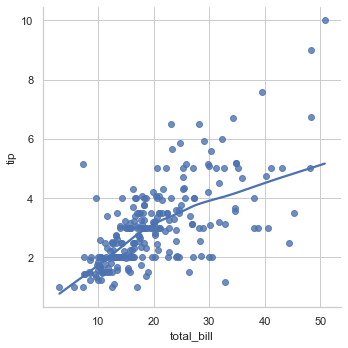

In [46]:
sns.lmplot(x='total_bill', y = 'tip', data=tips, lowess = True)

<b> This is a Computationally intensive process as it is robust and hence in the backend it doesn't take ci (Confidence Interval) into consideration. Here the line bends around to get more precise estimate as per the spread of data points, as visible.

In [47]:
# Loading another Built-in dataset
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


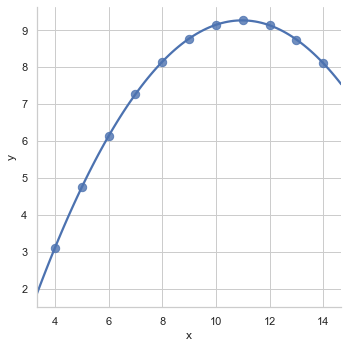

In [50]:
sns.lmplot(x='x', y = 'y', data = anscombe.query("dataset == 'II'"), order = 3, ci = None, scatter_kws = {'s' : 70})

This majorly helps to tackle Outliers in our dataset to fit a polynomial regression model to explore simple kinds of non linear trends because the linear relationship is the same but our simple plot wouldn't have been able to trace it.

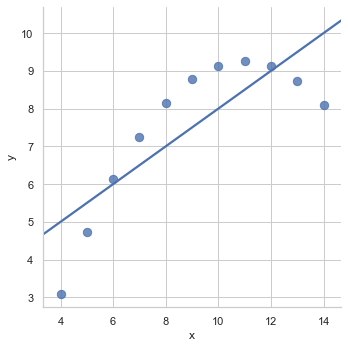

In [54]:
sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset =='II'"), ci = None, scatter_kws = {'s' : 70})
# scatter_kws --> s denotes the size of scattered dots

<b> Optional Parameters : </b>
<ul>Parameters like <code>x_jitter</code> and <code>y_jitter</code> are used to add noise to our dataset.</ul>
<ul><code>color</code> parameter helps you get Matplotlib style color.</ul>
<ul><code>dropna</code> helps to drop NaN (NULL) values.</ul>
<ul><code>x_estimator</code> param is useful with discrete variables.</ul>
<ul><code>ci</code> represents the size of <b>Confidence interval</b> used when plotting a central tendency for discrete values of x.</ul>
<ul><code>label</code> is used to assign a suitable name to either our <b>Scatterplot</b> (in legends) or <b>Regression line</b>.</ul>